In [1]:
#Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [2]:
grocery=pd.read_csv("/content/groceries.csv",sep=';',names=['items']) #Read Data


In [3]:
grocery.head()

,items
0,"citrus fruit,semi-finished bread,margarine,rea..."
1,"tropical fruit,yogurt,coffee"
2,whole milk
3,"pip fruit,yogurt,cream cheese ,meat spreads"
4,"other vegetables,whole milk,condensed milk,lon..."


In [4]:
items=[]
for i in grocery.values:
    items.extend( i[0].split(",")  )
items=list(set(items))
items

['sound storage medium',
 'specialty vegetables',
 'soap',
 'nuts/prunes',
 'mustard',
 'instant coffee',
 'zwieback',
 'bottled water',
 'pickled vegetables',
 'onions',
 'seasonal products',
 'popcorn',
 'ham',
 'dish cleaner',
 'whipped/sour cream',
 'brown bread',
 'soft cheese',
 'canned fruit',
 'photo/film',
 'potato products',
 'spread cheese',
 'coffee',
 'light bulbs',
 'sugar',
 'pet care',
 'salad dressing',
 'male cosmetics',
 'dishes',
 'roll products ',
 'sliced cheese',
 'oil',
 'dental care',
 'canned beer',
 'citrus fruit',
 'spices',
 'tea',
 'bottled beer',
 'frozen dessert',
 'cat food',
 'house keeping products',
 'baby cosmetics',
 'shopping bags',
 'specialty bar',
 'yogurt',
 'salty snack',
 'Instant food products',
 'pip fruit',
 'sausage',
 'liquor (appetizer)',
 'misc. beverages',
 'soda',
 'artif. sweetener',
 'white wine',
 'decalcifier',
 'pasta',
 'make up remover',
 'semi-finished bread',
 'syrup',
 'ready soups',
 'flour',
 'frozen potato products',
 '

In [5]:
# creating Column for all items

In [6]:
data = list(grocery["items"].apply(lambda x:x.split(',')))

te = TransactionEncoder()
te_data = te.fit(data).transform(data)
groc = pd.DataFrame(te_data,columns=te.columns_).astype(int)

groc

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,berries,beverages,bottled beer,bottled water,brandy,brown bread,butter,butter milk,cake bar,candles,candy,canned beer,canned fish,canned fruit,canned vegetables,cat food,cereals,chewing gum,chicken,chocolate,chocolate marshmallow,citrus fruit,cleaner,cling film/bags,cocoa drinks,coffee,condensed milk,cooking chocolate,cookware,cream,...,salty snack,sauces,sausage,seasonal products,semi-finished bread,shopping bags,skin care,sliced cheese,snack products,soap,soda,soft cheese,softener,sound storage medium,soups,sparkling wine,specialty bar,specialty cheese,specialty chocolate,specialty fat,specialty vegetables,spices,spread cheese,sugar,sweet spreads,syrup,tea,tidbits,toilet cleaner,tropical fruit,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
9831,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9832,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
9833,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
groc.describe()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,berries,beverages,bottled beer,bottled water,brandy,brown bread,butter,butter milk,cake bar,candles,candy,canned beer,canned fish,canned fruit,canned vegetables,cat food,cereals,chewing gum,chicken,chocolate,chocolate marshmallow,citrus fruit,cleaner,cling film/bags,cocoa drinks,coffee,condensed milk,cooking chocolate,cookware,cream,...,salty snack,sauces,sausage,seasonal products,semi-finished bread,shopping bags,skin care,sliced cheese,snack products,soap,soda,soft cheese,softener,sound storage medium,soups,sparkling wine,specialty bar,specialty cheese,specialty chocolate,specialty fat,specialty vegetables,spices,spread cheese,sugar,sweet spreads,syrup,tea,tidbits,toilet cleaner,tropical fruit,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
count,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,...,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000
mean,0.008033,0.033452,0.003559,0.003254,0.000610,0.000102,0.000407,0.017692,0.002745,0.052466,0.033249,0.026029,0.080529,0.110524,0.004169,0.064870,0.055414,0.027961,0.013218,0.008948,0.029893,0.077682,0.015048,0.003254,0.010778,0.023284,0.005694,0.021047,0.042908,0.049619,0.009049,0.082766,0.005084,0.011388,0.002237,0.058058,0.010269,0.002542,0.002745,0.001322,...,0.037824,0.005491,0.093950,0.014235,0.017692,0.098526,0.003559,0.024504,0.003050,0.002644,0.174377,0.017082,0.005491,0.000102,0.006812,0.005592,0.027351,0.008541,0.030402,0.003660,0.001729,0.005186,0.011185,0.033859,0.009049,0.003254,0.003864,0.002339,0.000712,0.104931,0.008134,0.006507,0.038434,0.071683,0.000813,0.042095,0.019014,0.255516,0.139502,0.006914
std,0.089268,0.179823,0.059552,0.056951,0.024693,0.010084,0.020164,0.131836,0.052326,0.222976,0.179294,0.159231,0.272124,0.313557,0.064435,0.246309,0.228799,0.164871,0.114213,0.094173,0.170301,0.267684,0.121751,0.056951,0.103261,0.150812,0.075247,0.143549,0.202660,0.217167,0.094701,0.275542,0.071124,0.106110,0.047245,0.233865,0.100822,0.050356,0.052326,0.036335,...,0.190780,0.073899,0.291774,0.118464,0.131836,0.298039,0.059552,0.154617,0.055148,0.051351,0.379453,0.129583,0.073899,0.010084,0.082260,0.074576,0.163113,0.092026,0.171698,0.060393,0.041542,0.071828,0.105169,0.180875,0.094701,0.056951,0.062042,0.048305,0.026670,0.306481,0.089827,0.080409,0.192252,0.257975,0.028510,0.200815,0.136580,0.436173,0.346487,0.082867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000

#Apriori Algorithm with 50 % minimum support

In [8]:
frequent_groc = apriori(groc, min_support=0.05,max_len=3,use_colnames = True)
frequent_groc

,support,itemsets
0,0.052466,(beef)
1,0.080529,(bottled beer)
2,0.110524,(bottled water)
3,0.064870,(brown bread)
4,0.055414,(butter)
5,0.077682,(canned beer)
6,0.082766,(citrus fruit)
7,0.058058,(coffee)
8,0.053279,(curd)
9,0.063447,(domestic eggs)


# using lift as metric and keeping the value as 1

In [9]:
rules = association_rules(frequent_groc, metric="lift", min_threshold=1)
rules.sort_values('lift',ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
5,(yogurt),(whole milk),0.139502,0.255516,0.056024,0.401603,1.571735,0.020379,1.244132
4,(whole milk),(yogurt),0.255516,0.139502,0.056024,0.219260,1.571735,0.020379,1.102157
1,(other vegetables),(whole milk),0.193493,0.255516,0.074835,0.386758,1.513634,0.025394,1.214013
0,(whole milk),(other vegetables),0.255516,0.193493,0.074835,0.292877,1.513634,0.025394,1.140548
2,(whole milk),(rolls/buns),0.255516,0.183935,0.056634,0.221647,1.205032,0.009636,1.048452
3,(rolls/buns),(whole milk),0.183935,0.255516,0.056634,0.307905,1.205032,0.009636,1.075696


In [10]:
#Scatter plot (lift vs support)

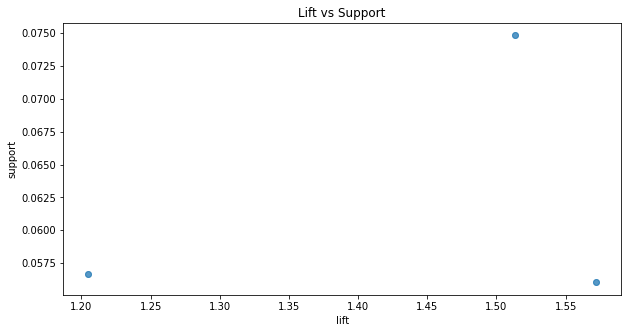

In [11]:
plt.figure(figsize=(10,5))
plt.scatter(rules['lift'], rules['support'], alpha=0.5)
plt.xlabel('lift')
plt.ylabel('support')
plt.title('Lift vs Support')
plt.show()

# using support as metric and keeping the value as 0.001

In [12]:
rules1 = association_rules(frequent_groc, metric="support", min_threshold=0.001)
rules1.sort_values('lift',ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
5,(yogurt),(whole milk),0.139502,0.255516,0.056024,0.401603,1.571735,0.020379,1.244132
4,(whole milk),(yogurt),0.255516,0.139502,0.056024,0.219260,1.571735,0.020379,1.102157
1,(other vegetables),(whole milk),0.193493,0.255516,0.074835,0.386758,1.513634,0.025394,1.214013
0,(whole milk),(other vegetables),0.255516,0.193493,0.074835,0.292877,1.513634,0.025394,1.140548
2,(whole milk),(rolls/buns),0.255516,0.183935,0.056634,0.221647,1.205032,0.009636,1.048452
3,(rolls/buns),(whole milk),0.183935,0.255516,0.056634,0.307905,1.205032,0.009636,1.075696


In [13]:
#Scatter plot ( support vs confidence)

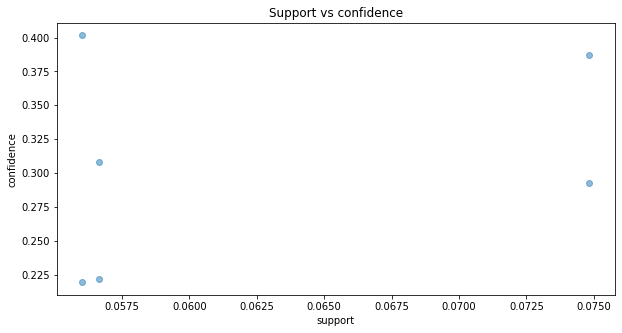

In [14]:


plt.figure(figsize=(10,5))
plt.scatter(rules1['support'], rules1['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs confidence')
plt.show()

# using confidence as metric and keeping the value as 1

In [15]:
rules2 = association_rules(frequent_groc, metric="confidence", min_threshold=1)
rules2.sort_values('lift',ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


In [16]:
#Scatter plot ( Confidence vs Lift)

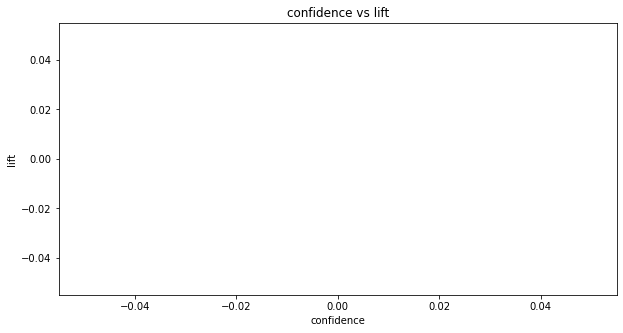

In [17]:

plt.figure(figsize=(10,5))
plt.scatter(rules2['confidence'], rules2['lift'], alpha=0.5)
plt.xlabel('confidence')
plt.ylabel('lift')
plt.title('confidence vs lift')
plt.show()

In [18]:
rules.sort_values('lift',ascending = False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
5,(yogurt),(whole milk),0.139502,0.255516,0.056024,0.401603,1.571735,0.020379,1.244132
4,(whole milk),(yogurt),0.255516,0.139502,0.056024,0.219260,1.571735,0.020379,1.102157
1,(other vegetables),(whole milk),0.193493,0.255516,0.074835,0.386758,1.513634,0.025394,1.214013
0,(whole milk),(other vegetables),0.255516,0.193493,0.074835,0.292877,1.513634,0.025394,1.140548
2,(whole milk),(rolls/buns),0.255516,0.183935,0.056634,0.221647,1.205032,0.009636,1.048452
3,(rolls/buns),(whole milk),0.183935,0.255516,0.056634,0.307905,1.205032,0.009636,1.075696


In [19]:
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(whole milk),(other vegetables),0.255516,0.193493,0.074835,0.292877,1.513634,0.025394,1.140548
1,(other vegetables),(whole milk),0.193493,0.255516,0.074835,0.386758,1.513634,0.025394,1.214013
2,(whole milk),(rolls/buns),0.255516,0.183935,0.056634,0.221647,1.205032,0.009636,1.048452
3,(rolls/buns),(whole milk),0.183935,0.255516,0.056634,0.307905,1.205032,0.009636,1.075696
4,(whole milk),(yogurt),0.255516,0.139502,0.056024,0.219260,1.571735,0.020379,1.102157
5,(yogurt),(whole milk),0.139502,0.255516,0.056024,0.401603,1.571735,0.020379,1.244132


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  


([<matplotlib.axis.XTick at 0x7fbc96596450>,
 [Text(0, 0, "frozenset({'beef'})"),
  Text(0, 0, "frozenset({'bottled beer'})"),
  Text(0, 0, "frozenset({'bottled water'})"),
  Text(0, 0, "frozenset({'brown bread'})"),
  Text(0, 0, "frozenset({'butter'})"),
  Text(0, 0, "frozenset({'canned beer'})"),
  Text(0, 0, "frozenset({'citrus fruit'})"),
  Text(0, 0, "frozenset({'coffee'})"),
  Text(0, 0, "frozenset({'curd'})"),
  Text(0, 0, "frozenset({'domestic eggs'})")])

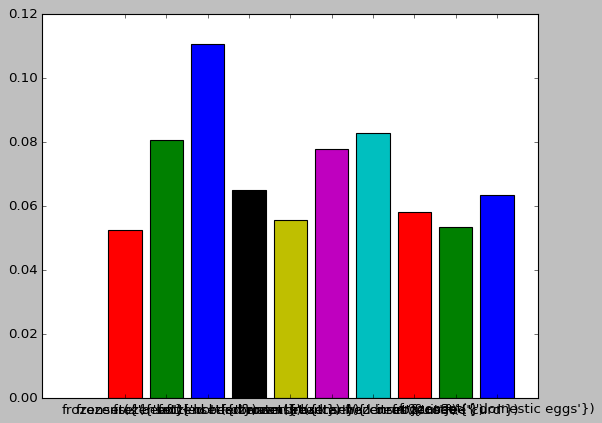

In [20]:
plt.style.use('classic')
plt.bar(x=list(range(0,10)),height=frequent_groc.support[0:10],color='rgbkymc')
plt.xticks(list(range(0,10)),frequent_groc.itemsets[0:10])